# Exercise Search Algorithms #


In [1]:
import sys
from pathlib import Path

sys.path.insert(0, str(Path().absolute()))

try:
    import search
finally:
    sys.path.pop(0)

In the last session, we prepared different classes that are useful to solve search problems. You completed the Node class that we can use now for our first search strategy *breadth_first_tree_search*.

If you had problems implementing the node class, please come and see me. Without the Node class, you can't solve the following exercises.

First, you need to implement the breadth first search strategy:

Hints: 
- create the FIFO queue frontier using collections.py, that implements high performance data types. The collection.deque allows you to easily extend the queue with `frontier.append` and to remove items from the queue with `frontier.popleft()`
- remember that you can access the children of a node with the following code: `node.expand(problem)`
- return the goal node if you can find it


In [2]:
from collections import deque


def breadth_first_graph_search(problem):
    """ This implements the breadth first search strategy
        and returns the goal node """
    node = search.Node(problem.initial)
    
    if problem.goal_test(node.state):
        return node  # we found a solution
    
    frontier = deque([node])
    explored = set([node])
    
    while frontier:
        node = frontier.popleft()  # chooses the shallowest node in frontier
        explored.add(node)
        
        for child in node.expand(problem):
            visited_states = [n.state for n in frontier] + [n.state for n in explored]
            if child.state not in visited_states:
                if problem.goal_test(child.state):
                    return child
                
                frontier.append(child)
    
    return None  # no solution found

Lets create a map from the text book example:

In [3]:
romania_map = search.UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

With this, we can test our search algorithm. We define our problem and let the breadth first search find a solution.

In [4]:
start = 'Arad'
goal = 'Bucharest'
problem = search.GraphProblem(start, goal, romania_map)
node = breadth_first_graph_search(problem)

The following code will show you some information about the search:

In [5]:
def print_info_about_search(node):
    print("The search algorithm reached " + node.state + " with a cost of " + str(node.path_cost) + ".")
    path = node.path()
    directions = ""
    for n in path:
        directions = directions + " > " + n.state
    print("The path is the following:" + directions)

print_info_about_search(node)

The search algorithm reached Bucharest with a cost of 450.
The path is the following: > Arad > Sibiu > Fagaras > Bucharest


Congratulations, you have implemented your first search algorithm!

## Swiss Railway System ##

The SBB OpenData platform (https://data.sbb.ch/) provides all train lines and hubs (Betriebsknotenpunkte) of their railway system. I briefly mentioned the data set in the beginning.

I created a SBB class that can be used to import the data from the json file:



In [6]:
from sbb import SBB

sbb = SBB()
sbb.importData('linie-mit-betriebspunkten.json')

successfully imported 2787 hubs
successfully imported 401 train lines


The object sbb contains know all the hubs and trainlines. We can visualize the hubs with matplotlib:

In [7]:
import matplotlib.pyplot as plt

def plot_hubs(hubs, labelNames = False):
    fig = plt.figure(figsize=(10,10))
    x =[]; y = []; names = [];
    for h in hubs:
        new_x = hubs[h].x
        new_y = hubs[h].y
        x.append(new_x)
        y.append(new_y)
        if labelNames:
            plt.text(new_x+0.01, new_y+0.01, h, fontsize=9)              
    plt.scatter(x,y, marker='.', color='black')  
    plt.axis('equal')
    
plot_hubs(sbb.hubs)

With a little imagination and geographic knowledge you can recognize the different regions of Switzerland.

We want to implement a search algorithm that finds the shortest way between 'Rotkreuz' and 'Thalwil'. In this exercise, we are not restricted to the official train lines. We can use the railway system with our own search agent and decide at each hub in which direction we want to go. If you have successfully implemented the classes above, the following code should execute and provide the directions between Rotkreuz and Zermatt.

In [8]:
start = 'Rotkreuz'
goal = 'Thalwil'
sbb_map = search.UndirectedGraph(sbb.createMap())
problem = search.GraphProblem(start, goal, sbb_map)
node = breadth_first_graph_search(problem)
print_info_about_search(node)

The search algorithm reached Thalwil with a cost of 36.906.
The path is the following: > Rotkreuz > Hunenberg_Chamleten > Hunenberg_Zythus > Cham > Cham_Alpenblick > Zug_Chollermuli > Zug_Schutzengel > Zug > Zug_Nord_Abzw > Baar_Lindenpark > Baar_Neufeld > Baar > Litti_Baar > Sihlbrugg > Horgen_Oberdorf > Oberrieden_Dorf > Thalwil


##  More Uninformed Search Algorithms ##

As you know, the breadth-search algorithm is just one of many search strategies. Implement the following search algorithms and evaluate their performance. You might have to adapt (or create a subclass) of certain classes we used before, to determine the depth of the search tree for example. You can use the PriorityQueue class below to implement the Uniform Cost Search.

1. Depth First Search (DFS)
1. Depth Limited Search (DLS)
1. Iterative Deepening Search (IDS)
1. Uniform Cost Search (UCS)

Try to visualize which nodes (hubs) have been visited by the search algorithm. Create for each search strategy an image that shows the start, the goal, the solution path and all the visited nodes.

Answer the following questions for each algorithm:

1. How does your algorithm deal with loops? 
1. Can you make an estimate about the time and memory requirements? 
1. Is your algorithm complete and optimal?

Fill the following table:

| Algorithm | start   | goal | cost | number of nodes visited | maximal stored nodes | complete | optimal |
|------|------|-----|-----|-----|-----|-----|-----|
| BFS| Rotkreuz | Thalwil | ~ 36 | 17 | 483 | Yes | Yes |
| DFS|Rotkreuz | Thalwil | 740 | 937 | 440 | semi | Yes |
| DLS|Rotkreuz | Thalwil | n/a | 81 | n/a | No | Maybe |
| IDS|Rotkreuz | Thalwil | 36 | 17 | 54 | Yes | Yes |
| UCS|Rotkreuz | Thalwil | 36 | 147 | 120 | Yes | Yes |



What is special about the sbb railway map in terms of complexity (branching factor, depth)? How could you preprocess the data set in order to reduce the search space?

--->

In [9]:
def plot_it(node, start, goal):
    fig = plt.figure(figsize=(10, 10))
    
    def get_lims_for_node(start, goal, zoom=0.3):
        goal_hub = sbb.hubs[goal]
        start_hub = sbb.hubs[start]

        x = goal_hub.x - (goal_hub.x - start_hub.x) / 2.0
        y = goal_hub.y - (goal_hub.y - start_hub.y) / 2.0

        ylims = [y - zoom, y + zoom]
        xlims = [x - zoom, x + zoom]
        return xlims, ylims

    xlims, ylims = get_lims_for_node(start, goal)

    def plot_internal(hubs, color, labels=False):
        if fig is None:
            plt.figure(figsize=(10, 10))

        x = [hubs[name].x for name in hubs]
        y = [hubs[name].y for name in hubs]

        plt.scatter(x, y, marker='.', color=color)
        plt.axis('equal')
        plt.axis('off')

        if ylims is not None:
            plt.ylim(ylims)

        if xlims is not None:
            plt.xlim(xlims)

        if labels:
            for h in hubs:
                show_because_of_x = True if xlims is None or xlims[0] < hubs[h].x < xlims[1] else False
                show_because_of_y = True if ylims is None or ylims[0] < hubs[h].y < ylims[1] else False
                if show_because_of_x and show_because_of_y:
                    plt.text(hubs[h].x, hubs[h].y, h, fontsize=6)
                    
    
    solution_nodes = node.solution() if isinstance(node, search.Node) else []
    solution_hubs = {name: sbb.hubs[name] for name in sbb.hubs if name in solution_nodes}
    start_hub = {name: sbb.hubs[name] for name in sbb.hubs if name == start}
    goal_hub = {name: sbb.hubs[name] for name in sbb.hubs if name == goal}

    plot_internal(sbb.hubs, 'silver')
    plot_internal(solution_hubs, 'orange')
    plot_internal(start_hub, 'green')
    plot_internal(goal_hub, 'red')

    plt.gca().legend(('all', 'solution', 'start', 'goal'))
    plt.show()

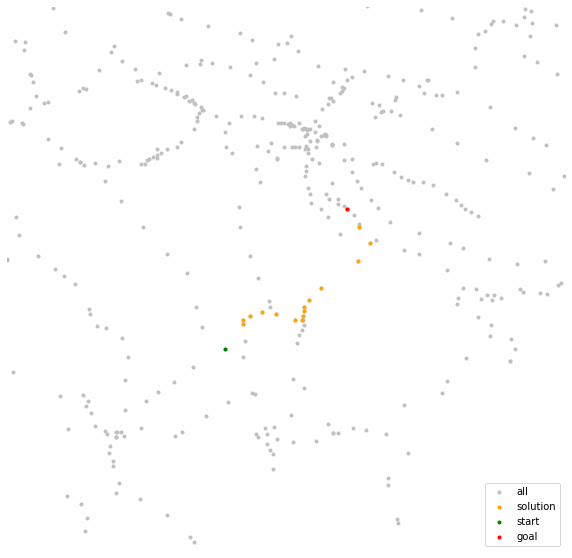

In [10]:
plot_it(node, start, goal)

## DFS

In [11]:
def depth_first_graph_search(problem):
    node = search.Node(problem.initial)
    
    if problem.goal_test(node.state):
        return node  # we found a solution
    
    frontier = deque([node])
    explored = set([node])
    
    while frontier:
        node = frontier.pop()
        explored.add(node)
        
        if problem.goal_test(node.state):
            return node
        
        for child in node.expand(problem):
            visited_states = [n.state for n in frontier] + [n.state for n in explored]
            if child.state not in visited_states:
                frontier.append(child)
    
    return None  # no solution found

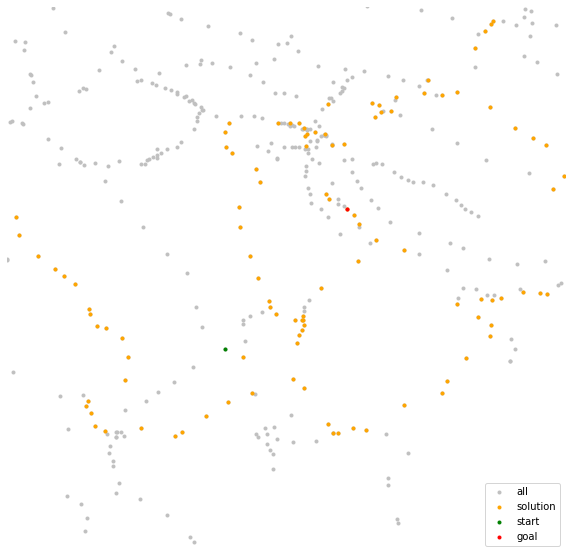

In [12]:
node = depth_first_graph_search(problem)
plot_it(node, start, goal)

## DLS

In [13]:
def recursive_depth_limited_graph_search(node, problem, limit):
    if problem.goal_test(node.state):
        return node

    elif limit == 0:
        return True

    else:
        cutoff = False
        for child in node.expand(problem):
            result = recursive_depth_limited_graph_search(child, problem, limit - 1)

            if isinstance(result, search.Node):
                return result
            elif result is True:
                cutoff = True

        if cutoff is True:
            return True
        else:
            return False

def depth_limited_graph_search(problem, limit):
    return recursive_depth_limited_graph_search(search.Node(problem.initial), problem, limit)

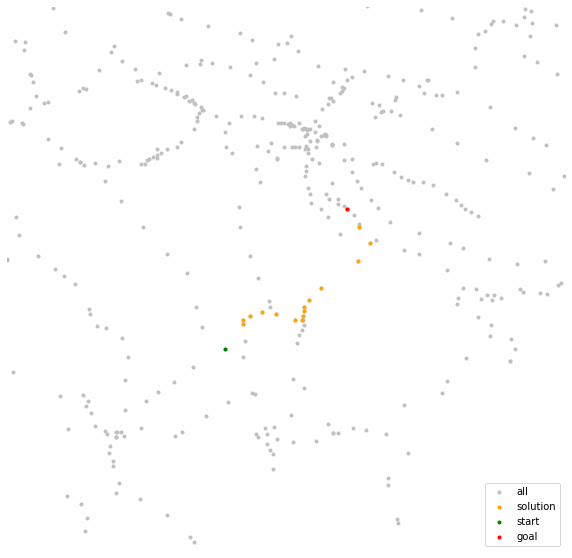

In [14]:
node = depth_limited_graph_search(problem, 20)
plot_it(node, start, goal)

## IDS

In [15]:
def iterative_depth_first_search(problem):
    limit = 1
    while True:
        result = depth_limited_graph_search(problem, limit)

        if isinstance(result, search.Node):
            return result
        elif result is False:
            return None
        else:
            limit = limit + 1

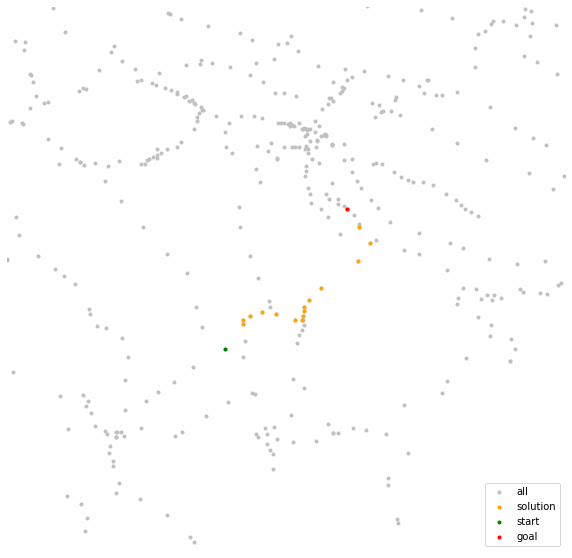

In [16]:
node = iterative_depth_first_search(problem)
plot_it(node, start, goal)

## UCS

In [17]:
def uniform_cost_search(problem):
    node = search.Node(problem.initial)
    
    frontier = search.PriorityQueue('min', lambda n: n.path_cost)
    frontier.append(node)
    explored = set([node])
    
    while frontier:
        node = frontier.pop()

        if problem.goal_test(node.state):
            return node
        
        explored.add(node)
        
        for child in node.expand(problem):
            if child not in frontier and child.state not in explored:
                frontier.append(child)
            else:
                visisted = [n for _, n in frontier.heap if n.state == child.state]
                if visisted:
                    del frontier[visisted[0]]
                    frontier.append(child)
    
    return None  # no solution found

In [ ]:
node = uniform_cost_search(problem)
plot_it(node, start, goal)